$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$

# Gaussian Distribution

How can we model a data? What is a good representation? 
One simple statistic is mean of the value, which describe the center of data points. 

$$
 \mu = \frac{1}{N} \sum_i^N x_i
$$

Including the center point, we can have a model that shows how the data is spread around the center. 
The model that we want is the highest around center, and decreasing as it goes far from the center.
Also the model outputs are expected to be positive. 
So, we can think of 

$$
m(x) = \frac{1}{\Vert x - \mu \Vert)}
$$


### Note:

first equation: mean = (1/len(data)) * sum(data)

second equation: center_dist = 1 / (2 ^ (drop_rate * sqrt(abs(data[int(len(data)/2)] - mean))))
where drop_rate can be defined as sigma * (-1/2) for dynamic adjusting

#### We want center_dist to be high
#### the second equation uses an exponent to remove '0'
#### we square the exponent to slow it down (otherwise its too sharp because.... its an exponent)
#### We add a drop rate multiplier so we can adjust the drop rate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

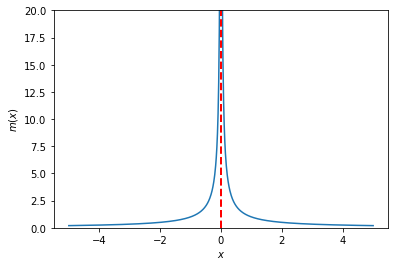

In [4]:
xs = np.linspace(-5,5,1000)
mu = 0
plt.plot(xs, 1/np.linalg.norm((xs - mu).reshape((-1, 1)), axis=1))
plt.ylim(0,20)
plt.plot([mu, mu], [0, 20], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$m(x)$');

The model meets our needs,
1. positive values
2. centering around the mean, decreasing when moving away from the center. 

But, the problem of this model is the infinite value at the mean. 

We can transform the denominator with exponent to prevent becoming zero. 


$$
m(x) = \frac{1}{2^{\Vert x - \mu \Vert}}
$$

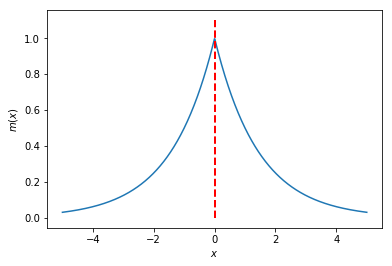

In [11]:
plt.plot(xs, 1/2**np.linalg.norm((xs - mu).reshape((-1, 1)), axis=1))
plt.plot([mu, mu], [0, 1.1], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$m(x)$');

This drops to fast and I do not like the discontinuity in the center. 
We can square the mean function to slow down:

$$
m(x) = \frac{1}{2^{\Vert x - \mu \Vert^2}}
$$

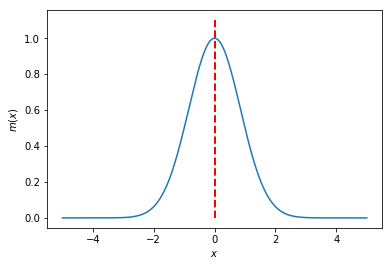

In [34]:
plt.plot(xs, 1/2**((xs - mu)** 2))
plt.plot([mu, mu], [0, 1.1], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$m(x)$');

Can I control the drop rate? Try to add the coefficient on it:

$$
m(x) = \frac{1}{2^{c \Vert x - \mu \Vert^2}}
$$

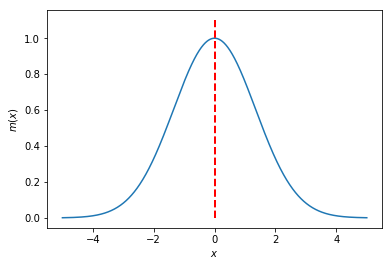

In [38]:
c = 0.4
plt.plot(xs, 1/2**(c * (xs - mu)** 2))
plt.plot([mu, mu], [0, 1.1], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$m(x)$');

Now, we reached the shape of the model we wanted. We also have a scalar to control the spread factor.
For numerical manupulation, exponent base 2 is not useful. For mathematical convenience, let us change base to $e$:

$$
m(x) = \frac{1}{e^{c \Vert x - \mu \Vert^2}}
$$

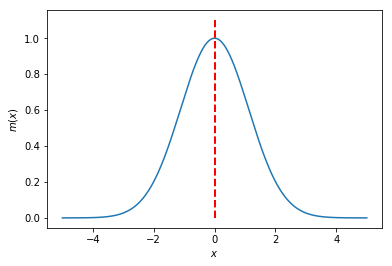

In [40]:
c = 0.4
plt.plot(xs, 1/np.exp(c * (xs - mu)** 2))
plt.plot([mu, mu], [0, 1.1], 'r--',lw=2)
plt.xlabel('$x$')
plt.ylabel('$m(x)$')

The scalar $c$ spread curve when it is small, and it narrows down the curve when it is large. 
So, we define the $\sigma = c^{-\frac{1}{2}}$ to be more intuitive interpretation. 
Now, when $\sigma$ grows, the curve widen the distribution of data. 

$$
m(x) = \frac{1}{e^{\sigma^{-2} \Vert x - \boldsymbol\mu \Vert^2}} = \frac{1}{ e^{ \frac{ \Vert x - \boldsymbol\mu \Vert^2}{\sigma^2}   } }  = e^{ -\big( \frac{ \Vert x - \boldsymbol\mu \Vert}{\sigma} \big)^2 } 
$$


Considering the derivatives in the future, the square term will have the exponent 2 product. To cancel this out, we can multiply the exponent by $\frac{1}{2}$. 

$$
m(x) = e^{ - \frac{1}{2} \big( \frac{ \Vert x - \boldsymbol\mu \Vert}{\sigma} \big)^2 } 
$$

To represent a probability distribution of data, we need to scale $m(x)$ to $p(x)$ that satisfy 

- $0 < p(x) < 1 $, 


- $\int_{-\infty}^{+\infty} p(x) dx = 1$.

There, we arrive at the Gaussian distribution function: 

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ - \frac{1}{2} \big( \frac{ \Vert x - \boldsymbol\mu \Vert}{\sigma}. \big)^2 } 
$$

Here we call $\mu$ mean, and $\sigma$ as standard deviation. 



# Multivariate Normal Distribution

https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png

We can generalize the previous 1-dimensional Gaussian distribution to multi-dimension. 
For each variable in $\xv$, we need to consider how they are correlated each other.
For instance, the distance to the mean can be computed as 
$ \boldsymbol\delta = \xv - \boldsymbol\mu = (\delta_1, \delta_2)$. 

$$\Vert \boldsymbol\delta \Vert^2 = \delta_1^2 + 2 \delta_1\delta_2 + \delta_2^2$$

For each term, we can consider three scalars, $(c_1, c_2, c_3)$,

$$c_1 \delta_1^2 + 2 c_2 \delta_1\delta_2 + c_3 \delta_2^2$$.

Considering the matrix for this, we can define

$$
\boldsymbol\Sigma = \begin{bmatrix}
    c_1 & c_2 \\
    c_2 & c_3 
\end{bmatrix}.
$$

Now, we can extend $\Vert \boldsymbol\delta \Vert^2 = \boldsymbol\delta^\top \boldsymbol\delta$ with the coefficient, 

$$
  \boldsymbol\delta^\top \boldsymbol\Sigma \boldsymbol\delta = c_1 \delta_1^2 + 2 c_2 \delta_1\delta_2 + c_3 \delta_2^2.
$$

In 1-d Gaussian function, we divide the distance term with the standard deviation, so we can replace $\boldsymbol\Sigma$ with $\boldsymbol\Sigma^{-1}$. 

Based on this, converting the normal function to multidimensional, we get 

$$
p(\xv) = \frac{1}{ (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma \vert^{\frac{1}{2}}} e^{ - \frac{1}{2} (\xv - \boldsymbol\mu)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu) }.
$$

### Note:
sigma = i dont get it


In [42]:
def normald(X, mu, sigma):
    """ normald:
       X contains samples, one per row, N x D. 
       mu is mean vector, D x 1.
       sigma is covariance matrix, D x D.  """
    D = X.shape[1]
    detSigma = sigma if D == 1 else np.linalg.det(sigma)
    if detSigma == 0:
        raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
    sigmaI = 1.0/sigma if D == 1 else np.linalg.inv(sigma)
    normConstant = 1.0 / np.sqrt((2*np.pi)**D * detSigma)
    diffv = X - mu.T # change column vector mu to be row vector
    return normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,np.newaxis]


In [43]:
X = np.array([[1,2],[3,5],[2.1,1.9]])
mu = np.array([[2],[2]])
Sigma = np.array([[1,0],[0,1]])
print(X)
print(mu)
print(Sigma)
normald(X, mu, Sigma)

[[ 1.   2. ]
 [ 3.   5. ]
 [ 2.1  1.9]]
[[2]
 [2]]
[[1 0]
 [0 1]]


array([[ 0.09653235],
       [ 0.00107238],
       [ 0.15757132]])

# Generative Model

Decision boundary from linear model like perceptron produes the outputs as the class labels. 
Alternative approoach called the generative model creates a model that can *generate* values for observation and target. 

Typically, the generative models are probabilistic, so they estimate the joint distribution $P(X, T)$ for the input $X$ and the target labels $T$. 
Bayes' rule is freqently applied to compute the joint distribution from the conditional probabilty. 

$$
 P(X, T) = P(X \mid T) P(T) = P(T \mid X) P(X)
$$

$$
  P(T \mid X) = \frac{P(X \mid T) P(T)}{P(X)}
$$

Based on this, we can build a regression or classification model that estimates the target $T$ given the input $X$.
Also, the probablistic model for the input and output can give additional information along with additional data sampling. } 

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$
# Discriminant Analysis


## Bayes Rule for Classification

Previously, we discussed about generative model and Bayes rule for supervised learning. 
For given data, we assume the target $T$ is discrete as before.
For instance, in the MNIST dataset, we can observe various image input $X$, and what we want to know is the probability of each classification given the data, thus 

$$
  P(T = 2 \mid X = x_i)  \quad\text{or}\quad P(T = k \mid X = x_i) \quad\text{for class label } k
$$

From the sample data, we must know or can model the distribution of each class $P(X = x_i \mid T = k)$.
Assuming the equally sampled data, 
$$
P(T=k) = \frac{1}{10} \\
\\
P(X=x_i) = \frac{1}{N} 
$$

where $N$ is the number of sample images. 

Using the Bayes Rule, 

$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\
    \\
                      &= \frac{P(X = x_i \mid T = k) \frac{1}{10}}{\frac{1}{N}} = \frac{N}{10} P(X = x_i \mid T = k)
\end{align*}
$$

![](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

## Choice of Likelihood

Now, how do we get $P(X = x_i \mid T = k)$? 

One good assumption is Gaussian model (or Normal distribution). 
Because of mathematical tracktabilty and central limit theorem, Gaussian assumption is popular:

$$
p(\xv \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) }.
$$

Here, we simplified the notation $\xv$ for $X = x_i$ with assumption of vector input. 

Now, let us apply Bayes rule for $P(T = k \mid \xv)$. 

$$
\begin{align*}
P(T = k \mid \xv) &= \frac{P(\xv \mid T = k) P(T = k)} { P(\xv) } \\
\\
                &= \frac{P(\xv \mid T = k) P(T = k)}  {\sum_{c=1}^{K} P(\xv, T=c)} \\
                \\
                &= \frac{P(\xv \mid T = k) P(T = k)}  {\sum_{c=1}^{K} P(\xv \mid T = c) P(T = c)}     
\end{align*}
$$

Pluggin in the Gaussian model for the likelihood function on this, we achieve 

$$
P(T = k \mid \xv) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k)} P(T = k)} { P(\xv) }.
$$


## Quadratic Discriminant Analysis (QDA) 

When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

To build our model to meet this expectation, we can play with the algebra a little bit. 

$$
\begin{align*}
  P(T = +1 \mid \xv) &> P(T = -1 \mid \xv) \\
  \\
  \frac{P(\xv \mid T = +1) P(T = +1)} { P(\xv) } &> \frac{P(\xv \mid T = -1) P(T = -1)} { P(\xv) } \\
  \\
  P(\xv \mid T = +1) P(T = +1)  &> P(\xv \mid T = -1) P(T = -1) \\
  \\
  \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_+ \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+)} P(T = +1)  &>
  \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_- \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-)} P(T = -1) \\
  \\
  \Big( \vert \boldsymbol\Sigma_+ \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+)} P(T = +1)  &>
  \Big( \vert \boldsymbol\Sigma_- \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-)} P(T = -1) 
\end{align*}
$$

Logarithm can remove exponent and multiplication for easier computation:

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $\xv$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

# Practice 

- Write a QDA code and apply to the following simple data. 

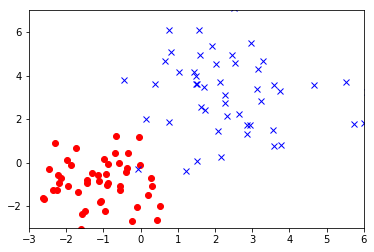

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

X = np.vstack((C1, C2))
T = np.ones(100)
T[:50] *= -1

In [4]:
# Train and Test data
N1 = C1.shape[0]
N2 = C2.shape[0]
N = N1 + N2

Xtrain = np.vstack((C1, C2))
Ttrain = np.ones(80)
Ttrain[:N1] *= -1

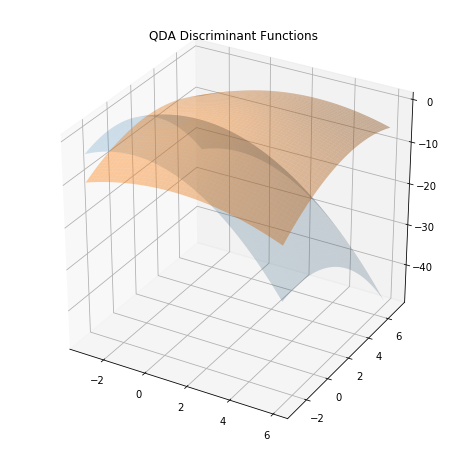

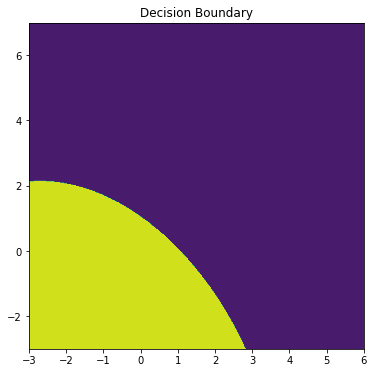

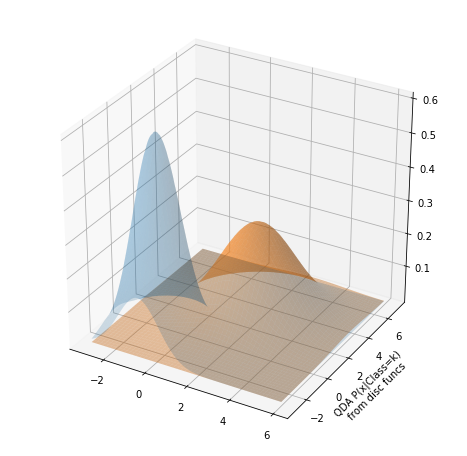

In [3]:
# define QDA discriminant function

def QDA(X, mu, sigma, prior):
    # TODO: finish the discriminant function here. 

    
    
# QDA train

## compute the mean and covariance

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xs = (Xtrain - means) / stds

mu1 = np.mean(Xs[:N1], 0)
mu2 = np.mean(Xs[N1:], 0)

Sigma1 = np.cov(Xs[:N1].T)
Sigma2 = np.cov(Xs[N1:].T)


prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest-means)/stds

d1 = QDA(XtestS, mu1, Sigma1, prior1)
d2 = QDA(XtestS, mu2, Sigma2, prior2)


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")


# Linear Discriminant Analysis (LDA)

Maintaining the covariance matrix is not cheap. Considering the input dimension $d$, the symmetric covariance meetric contains $\frac{d (d+1)}{2}$. 

Also, the data is undersampled, the resulting class boundary has high chance of overfitting. 

Simply using the same covariance for all the classes, we can reach the **linear discriminant analysis** model, which can overcome the stated problems above. 
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\
\\
-\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) &> -\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)\\
\\
 - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) &>  - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)\\ 
 \\
 - \frac{1}{2} \Big[ \xv^\top \boldsymbol\Sigma^{-1}\xv  -2 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ +  \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ \Big] + \ln P(T = +1) &>  - \frac{1}{2} \Big[ \xv^\top \boldsymbol\Sigma^{-1}\xv  -2 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- +  \boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_- \Big] + \ln P(T = -1)\\
 \\
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$



# Practice 

- Write a LDA code and apply to the previous data. 

ValueError: cannot reshape array of size 500000 into shape (500,500)

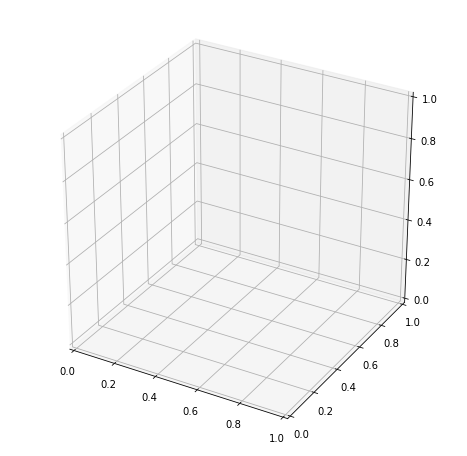

In [7]:
# define LDA discriminant function
import numpy as np
def LDA(X, mu, sigma, prior):
    return X * mu + (-1/2) * np.transpose(mu) * mu + np.log(prior)


# LDA train

## compute the mean and covariance

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xs = (Xtrain - means) / stds

mu1 = np.mean(Xs[:N1], 0)
mu2 = np.mean(Xs[N1:], 0)

Sigma = np.cov(Xs.T)

prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest-means)/stds

d1 = LDA(XtestS, mu1, Sigma, prior1)
d2 = LDA(XtestS, mu2, Sigma, prior2)


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")


$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
  \newcommand{\yv}{\mathbf{y}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$

# Logistic Regression 



Previously we discussed about using least squres to fit on the discrete target for classification.
When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. 

Now, we consider a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$


# Target

To generate multiple probability outputs for each class, we consider the indicator output targets. 

$$
\Tm = \begin{bmatrix}
        t_{1,1} & t_{1,2} & \cdots & t_{1, K} \\
        t_{2,1} & t_{2,2} & \cdots & t_{2, K} \\
        \vdots & & &     \vdots \\
        t_{N,1} & t_{N,2} & \cdots & t_{N, K} \\
      \end{bmatrix}
$$
where $t_{n,k}$ is 0 or 1 with only one 1 per each row. 

Note: Here the weight $\wv$ is not a vector any more. It is matrix with $D+1 \times K$ dimensions. 

# Likelihood

Assuming i.i.d (independently identically distributed) data, we can compute the likelihood as

$$
P(\Tm \mid \wv) = \prod_{n=1}^{N} \prod_{k=1}^{K} P(T = k \mid x_n)^{t_{n,k}} = \prod_{n=1}^{N} \prod_{k=1}^{K} y_{n,k}^{t_{n,k}}
$$

Since we maximize the likelihood function, we define our error function as the negative logarithm of it:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

This function is called *cross-entropy* error function for the multiclass classification problem. 



# Gradient Descent

As we practiced in least mean squares, we need to update the weight $\wv$ with the gradient:

$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$
with the learning rate $\alpha$. 


## Softmax Transformation

Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid \xv)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

To ensure this,

$$
P(T=k \mid \xv) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$

Since we are working with the logarithm, an exponent is a good idea.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$


## Back to Derivative

Here, 

$$
\begin{align*}
\nabla_{\wv_j} g_{n,k}(\xv) &= g_k(\xv) (I_{kj} - g_j(\xv)) \nabla_{\wv_j} (\wv^\top \xv) \\
    \\
            &= g_k(\xv) (I_{kj} - g_j(\xv))  \xv.
\end{align*}
$$


$$
\begin{align*}
\nabla_{\wv_j} E(\wv) &= \nabla_{\wv_j} \Big(-\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln g_{n,k}(\xv_n) \Big) \\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \nabla_{\wv_j} g_{n,k}(\xv_n)\\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(\xv_n)) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(\xv_n)) \Bigg) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} I_{kj} - g_j(\xv_n) \sum_{k=1}^{K} t_{n,k} ) \Bigg) \xv_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg(  t_{n,j} - g_j(\xv_n)\Bigg) \xv_n
\end{align*}
$$

Using the gradient, now we can update the weights, 

$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

Converting the summation into matrix calculation,

$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


# Implementation 

Before writing codes, let us check the matrix size!

- $\Xm: N \times (D+1)$
- $\Tm: N \times K$


- $\wv: (D+1) \times K$
- $t_{*,j}: N \times 1 $
- $g_j(\Xm): N \times 1 $


- $\Xm^\top \big( t_{*,j} - g_j(\Xm) \big)$: $(D+1) \times N \cdot \big( N \times 1 - N \times 1 \big) \Rightarrow (D+1) \times 1$

This gradient update one column of the weight matrix, so we can combine the computations:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Double checking the size of matrics,

- $\Xm^\top \big( \Tm - g(\Xm) \big)$: $(D+1) \times N \cdot \big( N \times K - N \times K \big) \Rightarrow (D+1) \times K$. 




# Practice

Read the note and practice codes.
Find TODO comment and finish the following:

- $g(.)$ function,
- the training codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# g(.) the softmax function

def g(X, w):
    # TODO: Finish your softmax function here

(-3, 7)

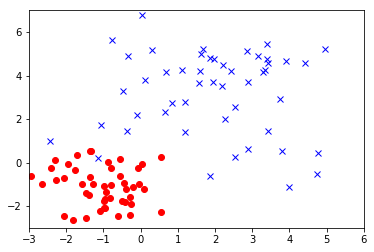

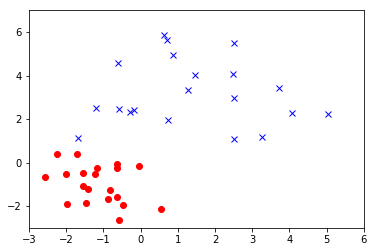

In [35]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 2))
Ttrain[:50, 0] = 1
Ttrain[50:, 1] = 1

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 2))
Ttest[:20, 0] = 1
Ttest[20:, 1] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

In [96]:
# initialize the weight matrix
w = np.random.rand(D+1, K)
#w = np.zeros((D+1), K)

In [ ]:
import IPython.display as ipd  # for display and clear_output
fig = plt.figure(figsize=(16, 8))

# iterate to update weights
niter = 1000
alpha = 0.1

X1 = np.hstack((np.ones((N, 1)), Xtrain))
likeli = []
for step in range(niter):
    # TODO: add training code here! 
    
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)    
    
X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
Y = g(X1t, w)

Y

Accuracy:  97.5 %


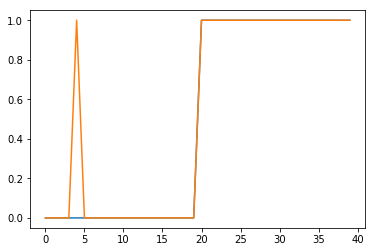

In [73]:
# retrieve labels and plot
Yl = np.argmax(Y, 1)
Tl = np.argmax(Ttest, 1)

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

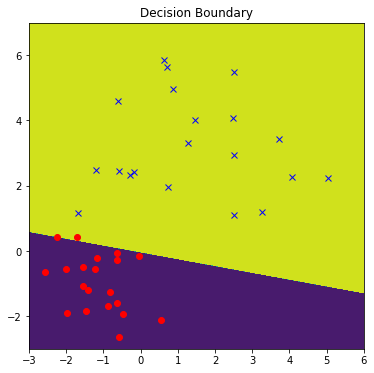

In [82]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))

Y = g(X1, w)
zs = np.argmax(Y, 1)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')
